In [53]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def read_polynomial_from_file(file_path):
    """
    Read a polynomial function from a text file and return it as a sympy expression.

    Args:
        file_path (str): The path to the text file containing the polynomial expression.

    Returns:
        sympy expression: The parsed polynomial expression.
    """
    with open(file_path, "r") as file:
        polynomial_str = file.read()
    
    # Parse the polynomial string into a sympy expression
    x, y = sp.symbols('x y')
    polynomial_expr = sp.sympify(polynomial_str)
    
    return polynomial_expr

def plot_contour_plot(polynomial_expr, x_range, y_range, num_points=100, cmap='viridis'):
    """
    Plot a contour plot (countourplot) of a polynomial function.

    Args:
        polynomial_expr (sympy expression): The polynomial expression to plot.
        x_range (tuple): A tuple (x_min, x_max) specifying the range of x values.
        y_range (tuple): A tuple (y_min, y_max) specifying the range of y values.
        num_points (int): The number of points in each dimension for the grid.
        cmap (str): The colormap to use for the plot.

    Returns:
        None
    """
    x_min, x_max = x_range
    y_min, y_max = y_range

    # Create a grid of x and y values
    x_values = np.linspace(x_min, x_max, num_points)
    y_values = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x_values, y_values)

    # Convert the sympy expression to a Python function
    polynomial_func = sp.lambdify((x, y), polynomial_expr, 'numpy')

    # Calculate Z values using the polynomial function
    Z = np.log(polynomial_func(X, Y))

    # Create the contour plot
    plt.figure()
    plt.contourf(X, Y, Z) #,20, cmap=cmap)
    plt.colorbar(label='Function Value')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot of Polynomial Function')
    plt.show()

def plot_obj(file_path):
    polynomial_expr = read_polynomial_from_file(file_path)
    w_range = (-10, 40)  # Specify the x range
    g_range = (-5, 5)  # Specify the y range
    plot_contour_plot(polynomial_expr, w_range, g_range)



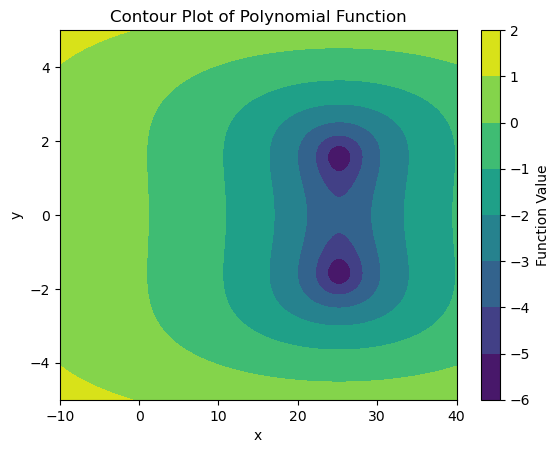

In [54]:
plot_obj("pop_lme_obj_2.5133.txt")

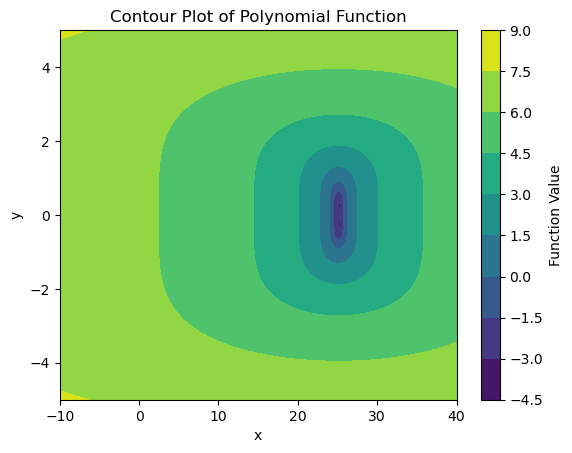

In [55]:
plot_obj("pop_lme_obj_0.079477.txt")

In [44]:
file_path = "pop_lme_obj_0.079477.txt"  # Replace with the path to your polynomial file
polynomial_expr = read_polynomial_from_file(file_path)
polynomial_expr

1.6614201470103742*g**4 - 0.264032152548434*g**2 + 0.7832643536919722*w**2 - 39.36077831667326*w + 494.50345291547956

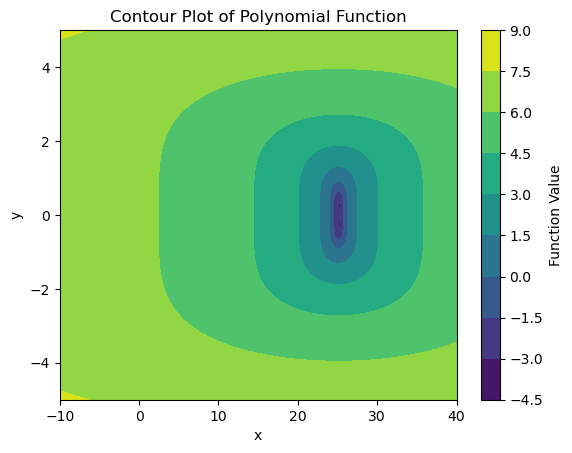

In [56]:
w_range = (-10, 40)  # Specify the x range
g_range = (-5, 5)  # Specify the y range
plot_contour_plot(polynomial_expr, w_range, g_range)